In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Load and combine
df_fake = pd.read_csv("data/Fake.csv")
df_true = pd.read_csv("data/True.csv")
df_fake['label'] = 1
df_true['label'] = 0
df = pd.concat([df_fake, df_true]).sample(frac=1, random_state=42).reset_index(drop=True)


In [3]:
# Combine title + text
df['content'] = df['title'] + " " + df['text']

In [4]:
# Download NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\achal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\achal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# Preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


In [6]:
# Apply
df['cleaned_content'] = df['content'].apply(preprocess)

# Check
df[['content', 'cleaned_content']].head()


,content,cleaned_content
0,Ben Stein Calls Out 9th Circuit Court: Committ...,ben stein call circuit court committed coup ét...
1,Trump drops Steve Bannon from National Securit...,trump drop steve bannon national security coun...
2,Puerto Rico expects U.S. to lift Jones Act shi...,puerto rico expects u lift jones act shipping ...
3,OOPS: Trump Just Accidentally Confirmed He Le...,oops trump accidentally confirmed leaked israe...
4,Donald Trump heads for Scotland to reopen a go...,donald trump head scotland reopen golf resort ...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # you can change the number of features

# Apply it on the cleaned content
X = tfidf.fit_transform(df['cleaned_content'])

# Target variable
y = df['label']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9858574610244989


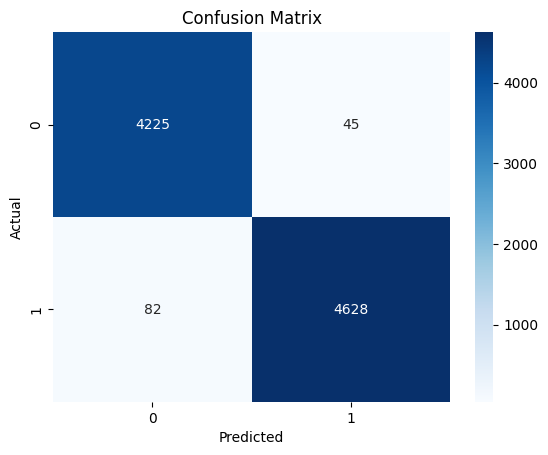

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4270
           1       0.99      0.98      0.99      4710

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [11]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [16]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'model/fake_news_model.pkl')
joblib.dump(tfidf, 'model/tfidf_vectorizer.pkl')

['model/tfidf_vectorizer.pkl']